# Download Stable Diffusion

1 - Log into Huggin Face and accept [Stable Diffusion License](https://huggingface.co/CompVis/stable-diffusion-v1-4)  
2 - [Generate a token here](https://huggingface.co/settings/tokens)
3 - Create a file named `credentials.ini` and add a section called `huggingface.co` with a key named `token` and paste the token value you generated above

Example `credentials.ini`
```
[huggingface.co]
token=hf_xxthisisnotarealtokenxx
```

In [2]:
from configparser import ConfigParser
parser = ConfigParser()
_ = parser.read('credentials.ini')

token = parser.get('huggingface.co', 'token')

- Let's check if our GPU is visible to docker. You should see the name of your GPU somewhere in this table.

In [3]:
!nvidia-smi

Thu Sep  1 01:33:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:09:00.0  On |                  N/A |
| 12%   55C    P0    41W / 225W |   7939MiB /  8192MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

- Check if GPU is visible to pyTorch

In [5]:
torch.cuda.is_available()

True

- Load the model from Hugging Face (download will take time)


In [ ]:
model = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4',
    use_auth_token=token,
    revision='fp16',
    torch_dtype=torch.float16,
)

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

- save model on your disk for later usage

In [7]:
model.save_pretrained('models/stable-diffusion-v1.4')

# Demo

- move model to the GPU

In [8]:
model = model.to('cuda')

0it [00:00, ?it/s]

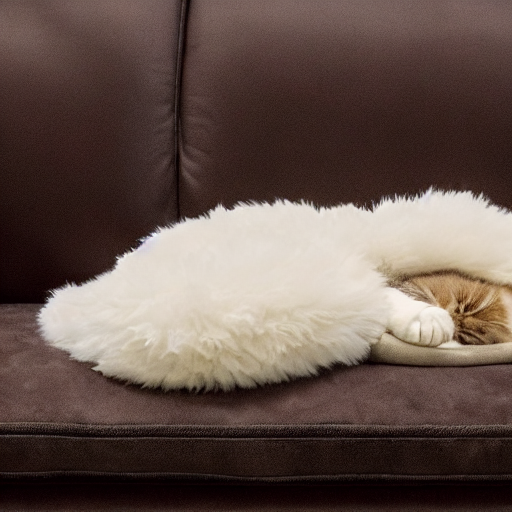

In [9]:
prompt = 'A puffy lazy cat sleeping on the couch, 8k'

with autocast('cuda'):
    output = model(prompt)
    
output['sample'][0]